In [10]:
import yt
import os

## Data Inspection

In [11]:
base_dir='/home/jmiller/programming/SimulationIO-yt-tests'
source_dir=base_dir+'/'+'cactus'
fname='iof5-multipatch-kerrschild.s5'
fpath=source_dir+'/'+fname
ds = yt.load(fpath, 
             configuration='iteration.0000000000-timelevel.0')

In [12]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	           512	             8
  1	     1	          4096	            16
  2	     1	           512	             8
----------------------------------------------
   	     3	          5120


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 2.025e-24 Mpc
	Width: 2.025e-18 pc
	Width: 4.178e-13 AU
	Width: 6.250e+00 cm


In [13]:
ds.field_list

[('simulationio', 'GRID::r'),
 ('simulationio', 'GRID::x'),
 ('simulationio', 'GRID::y'),
 ('simulationio', 'GRID::z')]

In [14]:
ds.derived_field_list

[('index', 'cell_volume'),
 ('index', 'cylindrical_r'),
 ('index', 'cylindrical_radius'),
 ('index', 'cylindrical_theta'),
 ('index', 'cylindrical_z'),
 ('index', 'disk_angle'),
 ('index', 'dx'),
 ('index', 'dy'),
 ('index', 'dz'),
 ('index', 'grid_indices'),
 ('index', 'grid_level'),
 ('index', 'height'),
 ('index', 'ones'),
 ('index', 'ones_over_dx'),
 ('index', 'path_element_x'),
 ('index', 'path_element_y'),
 ('index', 'path_element_z'),
 ('index', 'radius'),
 ('index', 'spherical_phi'),
 ('index', 'spherical_r'),
 ('index', 'spherical_radius'),
 ('index', 'spherical_theta'),
 ('index', 'virial_radius_fraction'),
 ('index', 'x'),
 ('index', 'y'),
 ('index', 'z'),
 ('index', 'zeros'),
 ('simulationio', 'GRID::r'),
 ('simulationio', 'GRID::x'),
 ('simulationio', 'GRID::y'),
 ('simulationio', 'GRID::z')]

In [15]:
print ds.domain_width

[ 2.  2.  2.] code_length


In [16]:
print ds.index.grid_left_edge

[[-1.   -1.   -1.  ]
 [-1.   -1.   -1.  ]
 [-0.25 -0.25 -0.25]] code_length


In [17]:
g = ds.index.grids[0]

In [18]:
ds.field_list[0]

('simulationio', 'GRID::r')

In [19]:
for f in ds.field_list:
    fv = g[f]
    if fv.size == 0: continue
    print f, fv.min(), fv.max()

yt : [INFO     ] 2016-04-04 18:24:22,902 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-04 18:24:22,911 SimulationIO: Reading field "GRID::x"
yt : [INFO     ] 2016-04-04 18:24:22,915 SimulationIO: Reading field "GRID::y"
yt : [INFO     ] 2016-04-04 18:24:22,919 SimulationIO: Reading field "GRID::z"


('simulationio', 'GRID::r') 0.216506350946 dimensionless 1.51554445662 dimensionless
('simulationio', 'GRID::x') -0.875 dimensionless 0.875 dimensionless
('simulationio', 'GRID::y') -0.875 dimensionless 0.875 dimensionless
('simulationio', 'GRID::z') -0.875 dimensionless 0.875 dimensionless


In [20]:
sp = ds.sphere([0.0, 0.0, 0.0], (0.25, 'm'))

In [21]:
print sp

YTSphere (iof5-refined-cell.s5): , center=[ 0.  0.  0.] cm, radius=25.0 cm


In [22]:
print sp.quantities.keys()

['SpinParameter', 'MinLocation', 'WeightedVariance', 'TotalMass', 'AngularMomentumVector', 'WeightedAverageQuantity', 'TotalQuantity', 'CenterOfMass', 'BulkVelocity', 'Extrema', 'MaxLocation']


In [23]:
print sp.quantities.total_quantity('ones')

320.0 dimensionless


In [24]:
print sp.quantities.extrema('GRID::r')

yt : [INFO     ] 2016-04-04 18:24:23,137 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-04 18:24:23,141 SimulationIO: Reading field "GRID::r"


[ 0.05412659  0.2400358 ] dimensionless


In [25]:
print sp.quantities.total_quantity('GRID::x')

yt : [INFO     ] 2016-04-04 18:24:23,173 SimulationIO: Reading field "GRID::x"
yt : [INFO     ] 2016-04-04 18:24:23,176 SimulationIO: Reading field "GRID::x"


0.0 dimensionless


## Simple Visualization

yt : [INFO     ] 2016-04-04 18:25:25,814 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-04 18:25:25,820 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:25:25,821 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:25:25,825 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:25:25,825 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:25:25,827 Making a fixed resolution buffer of (('index', 'grid_level')) 800 by 800
yt : [INFO     ] 2016-04-04 18:25:25,854 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800



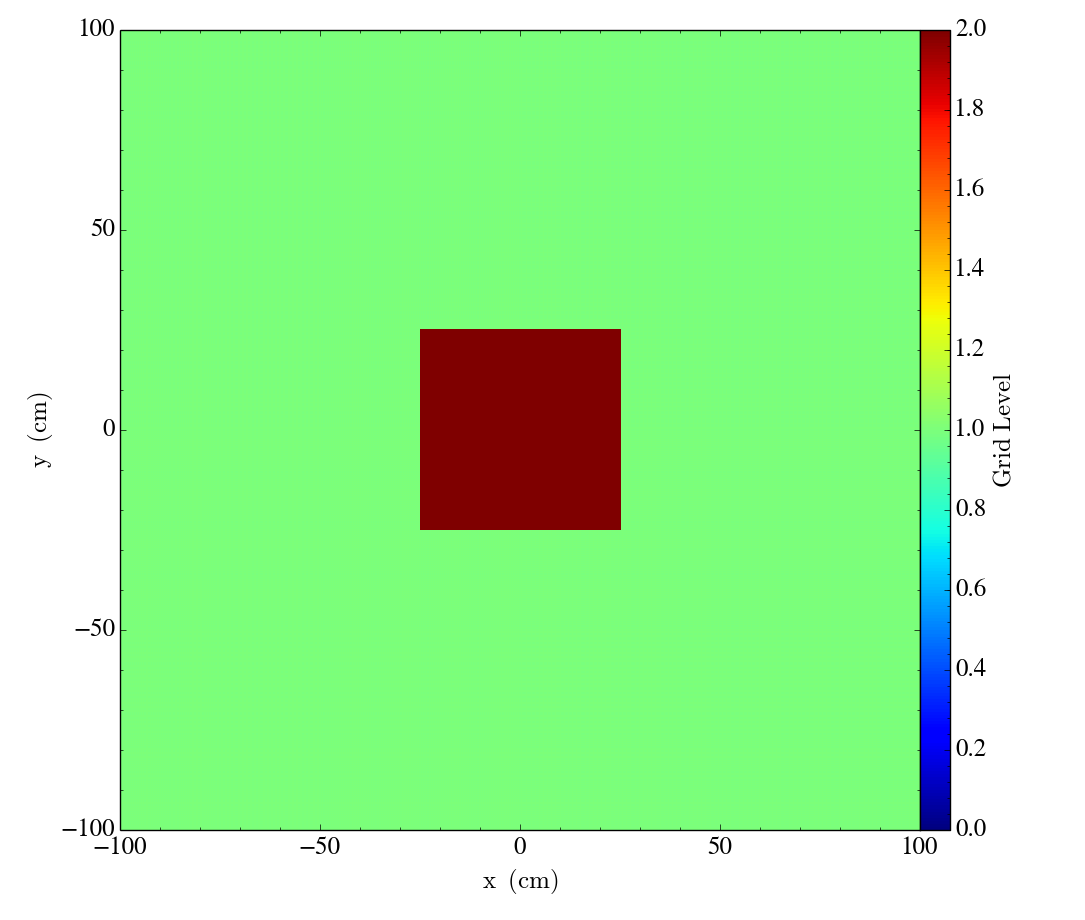

In [29]:
p = yt.SlicePlot(ds, "z", ["grid_level", "GRID::r"])
#p.set_figure_size(2)
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
p.set_zlim("all", 0, 2)
p.show()

In [32]:
p = yt.SlicePlot(ds, "z", "GRID::r")
p.set_cmap(field="all", cmap="jet")
p.set_log("all", False)
p.set_zlim("all", 0, 2)
p.annotate_grids()
#p.save("GRID-r.png")
p.show()

yt : [INFO     ] 2016-04-04 18:27:03,336 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-04 18:27:03,340 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:03,340 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:03,342 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:03,343 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:03,344 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800


In [33]:
p = yt.SlicePlot(ds, "z", "GRID::r")
p.set_cmap(field="all", cmap="jet")
p.annotate_streamlines("GRID::x", "GRID::y")
p.show()

yt : [INFO     ] 2016-04-04 18:27:30,571 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-04 18:27:30,575 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:30,576 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:30,578 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:30,578 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:30,579 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800
yt : [INFO     ] 2016-04-04 18:27:30,883 SimulationIO: Reading field "GRID::x"
yt : [INFO     ] 2016-04-04 18:27:30,886 SimulationIO: Reading field "GRID::y"


yt : [INFO     ] 2016-04-04 18:27:55,613 SimulationIO: Reading field "GRID::r"
yt : [INFO     ] 2016-04-04 18:27:55,616 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:55,616 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:55,618 xlim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:55,619 ylim = -1.000000 1.000000
yt : [INFO     ] 2016-04-04 18:27:55,620 Making a fixed resolution buffer of (('simulationio', 'GRID::r')) 800 by 800



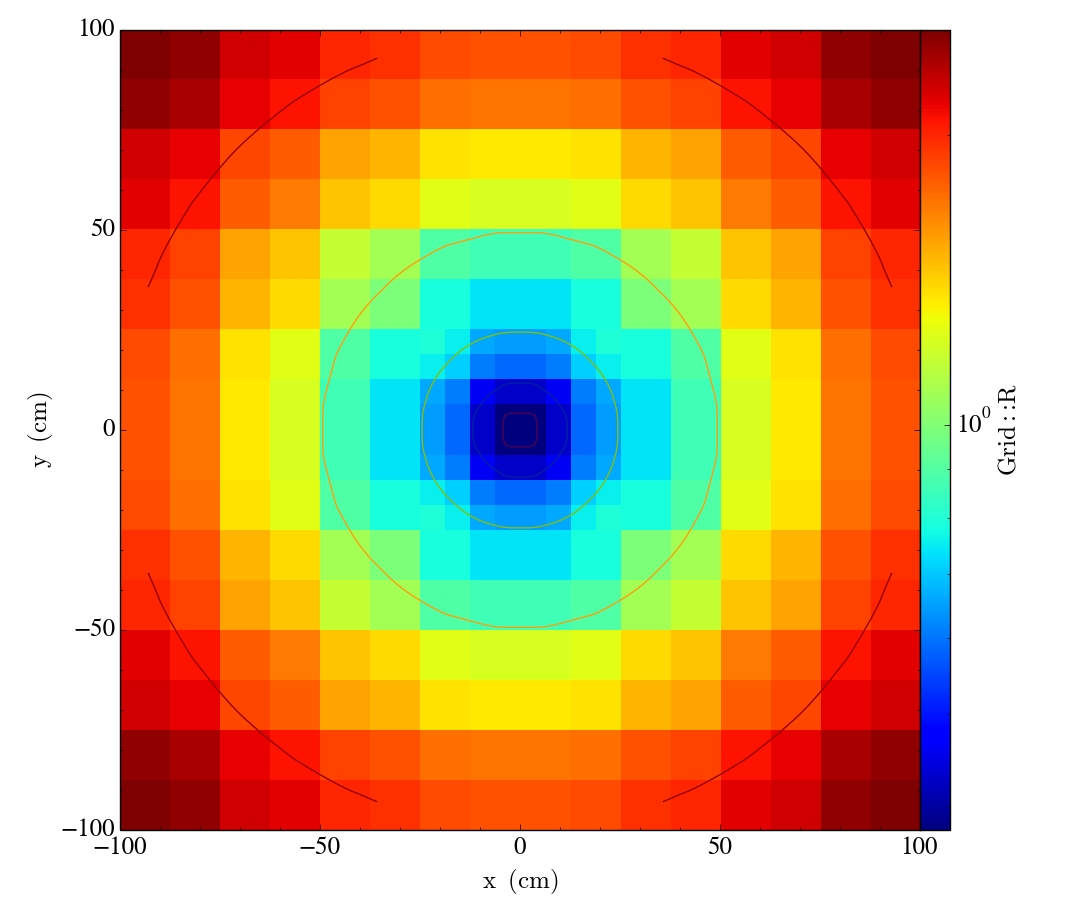

In [35]:
p = yt.SlicePlot(ds, "z", "GRID::r")
p.set_cmap(field="all", cmap="jet")
p.annotate_contour("GRID::r")
p.show()

In [ ]:
tf = yt.ColorTransferFunction((0, 1))
tf.add_layers(4, w=0.01)
cam = ds.camera([0.5, 0.5, 0.5], [1.0, 1.0, 1.0], (2, 'code_length'), 512, tf, fields=["GRID::r"])
cam.show()